In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [3]:
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [4]:
def rmse(model, x, y):
    y_pred = model.predict(x)
    mse = mean_squared_error(y_pred, y)
    rmse = np.sqrt(mse)
    return(rmse)

In [5]:
import pandas as pd
df= pd.read_csv("data.csv", delimiter=',', header=None, skiprows=1, names=['STRD_DATE','MKT_NDX_CD','MKT_NDX_NM','DY_CHAG_RT','RC_DD5_CHAG_RT','RC_DD20_CHAG_RT',
                                                                           'RC_DD60_CHAG_RT',
                                                                           'RC_DD120_CHAG_RT','RC_WW52_CHAG_RT','CNRDYR_CHAG_RT','TRNS_QT_DD5_CHAG_RT', 'TRNS_QT_DD20_STRD_CHAG_RT',
                                                                           'TRNS_QT_DD60_STRD_CHAG_RT', 'TRG_RT', 'ARGTG_RT', 'DD5_MOV_AVG_VAL',
                                                                           'MACD_RATE', 'ROC_RATE', 'TRIX_RATE', 'CCI_RATE', 'BLNGR_TOP_RATE', 'BLNGR_LTSTP_RATE', 
                                                                           'ZSCR_RATE', 'DMI_PLUS_VAL', 'DMI_MNS_VAL', 'ADX_VAL', 'ADXR_VAL', 'STCHSTCFSK5_VAL',
                                                                           'STCHSTCFSK3_VAL', 'STCHSTCLW5_VAL', 'STCHSTCLW3_VAL', 'RSI14_VAL', 
                                                                           'DD5_DSPT_RATE', 'DD20_DSPT_RATE', 'DD60_DSPT_RATE', 'DD120_DSPT_RATE', 'DD200_DSPT_RATE',
                                                                           'DD20_VLTY_RATE', 'DD60_VLTY_RATE', 'DD90_VLTY_RATE', 'MFI_VAL', 'VR_VAL', 'OBV_VAL', 'ADR_RT',
                                                                           'ADL_NUM', 'LOAD_DTM', 'CENT_CD'
                                                                           ])

In [6]:
print(len(df))

df.fillna(0, inplace=True)

print(len(df))

df.head(20)

86072
86072


,STRD_DATE,MKT_NDX_CD,MKT_NDX_NM,DY_CHAG_RT,RC_DD5_CHAG_RT,RC_DD20_CHAG_RT,RC_DD60_CHAG_RT,RC_DD120_CHAG_RT,RC_WW52_CHAG_RT,CNRDYR_CHAG_RT,...,DD20_VLTY_RATE,DD60_VLTY_RATE,DD90_VLTY_RATE,MFI_VAL,VR_VAL,OBV_VAL,ADR_RT,ADL_NUM,LOAD_DTM,CENT_CD
0,20101229,242,코스닥 IT S/W & SVC,0.00,0.00,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1,20110118,243,코스닥 IT H/W,-0.35,-1.55,0.0,0.0,0.0,0.0,3.59,...,0.0,0.0,0.0,62.33,0.0,320189200.0,0.0,0.0,0.0,0.0
2,20110113,243,코스닥 IT H/W,-0.27,0.31,0.0,0.0,0.0,0.0,5.55,...,0.0,0.0,0.0,0.00,0.0,772138100.0,0.0,0.0,0.0,0.0
3,20110114,243,코스닥 IT H/W,-0.42,-0.59,0.0,0.0,0.0,0.0,5.10,...,0.0,0.0,0.0,0.00,0.0,611507900.0,0.0,0.0,0.0,0.0
4,20110118,7,"코스피 종이,목재",-1.35,-2.67,0.0,0.0,0.0,0.0,-1.05,...,0.0,0.0,0.0,41.09,0.0,-32834300.0,0.0,0.0,0.0,0.0
5,20110120,7,"코스피 종이,목재",-0.09,-1.25,0.0,0.0,0.0,0.0,-1.49,...,0.0,0.0,0.0,36.46,0.0,-46541000.0,0.0,0.0,0.0,0.0
6,20110120,256,"코스닥 음식료,담배",-5.09,0.02,0.0,0.0,0.0,0.0,7.88,...,0.0,0.0,0.0,49.28,0.0,-96040100.0,0.0,0.0,0.0,0.0
7,20110118,8,코스피 화학,0.57,-1.08,0.0,0.0,0.0,0.0,4.09,...,0.0,0.0,0.0,66.84,0.0,107832300.0,0.0,0.0,0.0,0.0
8,20110125,8,코스피 화학,0.49,1.00,0.0,0.0,0.0,0.0,5.13,...,0.0,0.0,0.0,64.15,0.0,179122100.0,0.0,0.0,0.0,0.0
9,20110117,258,"코스닥 섬유,의류",-1.93,-2.16,0.0,0.0,0.0,0.0,0.98,...,0.0,0.0,0.0,0.00,0.0,3149900.0,0.0,0.0,0.0,0.0


In [7]:
X = df[['STRD_DATE','MKT_NDX_CD','RC_DD5_CHAG_RT','RC_DD20_CHAG_RT',
          'RC_DD60_CHAG_RT',
          'RC_DD120_CHAG_RT','RC_WW52_CHAG_RT','CNRDYR_CHAG_RT','TRNS_QT_DD5_CHAG_RT', 'TRNS_QT_DD20_STRD_CHAG_RT',
          'TRNS_QT_DD60_STRD_CHAG_RT', 'TRG_RT', 'ARGTG_RT', 'DD5_MOV_AVG_VAL',
          'MACD_RATE', 'ROC_RATE', 'TRIX_RATE', 'CCI_RATE', 'BLNGR_TOP_RATE', 'BLNGR_LTSTP_RATE', 
          'ZSCR_RATE', 'DMI_PLUS_VAL', 'DMI_MNS_VAL', 'ADX_VAL', 'ADXR_VAL', 'STCHSTCFSK5_VAL',
          'STCHSTCFSK3_VAL', 'STCHSTCLW5_VAL', 'STCHSTCLW3_VAL', 'RSI14_VAL', 
          'DD5_DSPT_RATE', 'DD20_DSPT_RATE', 'DD60_DSPT_RATE', 'DD120_DSPT_RATE', 'DD200_DSPT_RATE',
          'DD20_VLTY_RATE', 'DD60_VLTY_RATE', 'DD90_VLTY_RATE', 'MFI_VAL', 'VR_VAL', 'OBV_VAL', 'ADR_RT',
          'ADL_NUM', 'LOAD_DTM', 'CENT_CD']]
Y = df['DY_CHAG_RT'] # 일변동률


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle = False)
#train_features = train[['기준일자','시장지수코드','시장지수명','일변동율','최근5일변동율','최근20일변동율','최근60일변동율',
#                                                                           '최근120일변동율','최근52주변동율','당해년도변동율','거래량5일변동율', '거래량20일기준변동율',
#                                                                           '거래량60일기준변동율', 'truerange율', 'averagetruerange5일율', '5일이동평균값',
#                                                                           'MACD비율', 'ROC비율', 'TRIX비율', 'CCI비율', '볼린저밴드상단비율', '볼린저밴드하단비율', 
#                                                                           'Zscore비율', 'DMIPLUS값', 'DMIMINUS값', 'ADX값', 'ADXR값', 'STOCHASTICFASTK5값',
#                                                                           'STOCHASTICFASTK3값', 'STOCHASTICSLOW5값', 'STOCHASTICSLOW3값', '14RSI값', 
#                                                                           '5일이격도비율', '20일이격도비율', '60일이격도비율', '120일이격도비율', '200일이격도비율',
#                                                                           '20일변동성비율', '60일변동성비율', '90일변동성비율', 'MFI값', 'VR값', 'OBV값', 'ADR율',
#                                                                           'ADL수', '적재일시', '센터코드']] # works OK

# 데이터(X)와 레이블(Y)을 넣었을 경우
# shuffle = False

In [8]:
# -----------------------------------------------------------------

In [9]:
# lasso regression

lasso = Lasso(alpha =0.0005, random_state=3)

In [10]:
# ElasticNet regression 

ENet = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)

In [11]:
# kernel Ridge regression

KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5) #kernel = 'rbf' , 'sigmoid' 

In [12]:
# Gradient Boosting Regression

GBoost = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1,
                                   max_depth=3, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [13]:
# LGB Regressor

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.1, n_estimators=500,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [14]:
# XGBoost Algorithm (without GridSearch)

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4, gamma=0.03, 
                             learning_rate=0.14, max_depth=4, 
                             min_child_weight=1.5, n_estimators=500,
                             reg_alpha=0.5, reg_lambda=0.5, tree_method="gpu_hist",
                             subsample=0.5, random_state =3, nthread = -1)

In [15]:
# SVR with GridSearch

model_svr = SVR(C=1, cache_size=200, coef0=0, degree=3, epsilon=0.0, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [16]:
# Random Forest Regressor with GridSearch


regr = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=150, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

#grid_search.best_estimator_

In [17]:
# -----------------------------------------------------

In [18]:
lasso.fit(x_train, y_train)
ENet.fit(x_train, y_train)

/nfs/home/kit7777777t/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17431.433219660932, tolerance: 17.89013930670375
  positive)
/nfs/home/kit7777777t/.local/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17791.90341876273, tolerance: 17.89013930670375
  positive)


ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True, l1_ratio=0.9,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=3, selection='cyclic', tol=0.0001, warm_start=False)

In [19]:
GBoost.fit(x_train, y_train)
model_xgb.fit(x_train, y_train)
model_lgb.fit(x_train, y_train)

LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
              boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              feature_fraction=0.2319, feature_fraction_seed=9,
              importance_type='split', learning_rate=0.1, max_bin=55,
              max_depth=-1, min_child_samples=20, min_child_weight=0.001,
              min_data_in_leaf=6, min_split_gain=0.0,
              min_sum_hessian_in_leaf=11, n_estimators=500, n_jobs=-1,
              num_leaves=5, objective='regression', random_state=None,
              reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [20]:
#model_svr.fit(x_train, y_train)

In [21]:
score = rmse(lasso, x_train, y_train)
print("Lasso rmse: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Lasso rmse: 0.7450 (0.0000)



In [22]:
score = rmse(ENet, x_train, y_train)
print("ElasticNet rmse: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet rmse: 0.7450 (0.0000)



In [23]:
# Gradient Boosting score
score = rmse(GBoost, x_train, y_train)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.6487 (0.0000)



In [24]:
# XGBoost score
score = rmse(model_xgb, x_train, y_train)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.5329 (0.0000)



In [25]:
score = rmse(model_lgb, x_train, y_train)
print("LGBM: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

LGBM: 0.7712 (0.0000)



In [26]:
#score = rmse(model_svr, x_train, y_train)
#print("Support Vector Regressor rmse: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [27]:
#score = rmse(regr, x_train, y_train)
#print("Random Forest Regressor rmse: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [28]:
# -------------------------------------------------------

In [29]:
from joblib import load
def real_value(X):
    robust, quantile = load("robust.pkl"), load("quantile.pkl")
    if isinstance(X, pd.Series):
        X = X.values.reshape(-1, 1)
    else:
        X = X.reshape(-1, 1)
    return robust.inverse_transform(quantile.inverse_transform(X)).reshape(-1)

In [30]:
def erratio_wreal(model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_test, y_pred = np.array(real_value(y_test)), np.array(real_value(y_pred))
    err = y_pred - y_test
    ratio = err / y_test * 100
    return ratio.mean()

In [31]:
print("Lasso error ratio : {}".format(erratio_wreal(lasso, x_test, y_test)))
print("ElasticNet error ratio : {}".format(erratio_wreal(ENet, x_test, y_test)))

print("Gradient Boosting error ratio : {}".format(erratio_wreal(GBoost, x_test, y_test)))
print("Xgboost error ratio : {}".format(erratio_wreal(model_xgb, x_test, y_test)))
print("LGBM rmse error ratio : {}".format(erratio_wreal(model_lgb, x_test, y_test)))


Lasso error ratio : 28.047232458623533
ElasticNet error ratio : 28.051869326344484
Gradient Boosting error ratio : 15.736785098111417
Xgboost error ratio : 17.001498001818952
LGBM rmse error ratio : 24.140841137807225


# Graph

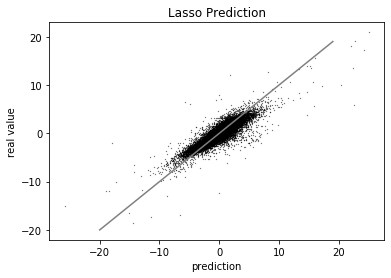

In [44]:
lasso_train_pred = lasso.predict(x_train)

x = np.arange(-20,20) 
y = x

plt.plot(x, y, color = 'gray')
plt.scatter(y_train, lasso_train_pred, s=0.05, color='black')
plt.xlabel('prediction')
plt.ylabel('real value')
plt.title('Lasso Prediction')
plt.show()

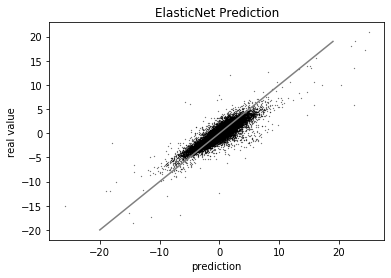

In [45]:
enet_train_pred = ENet.predict(x_train)

x = np.arange(-20,20) 
y = x

plt.plot(x, y, color = 'gray')
plt.scatter(y_train, enet_train_pred, s=0.05, color='black')
plt.xlabel('prediction')
plt.ylabel('real value')
plt.title('ElasticNet Prediction')
plt.show()

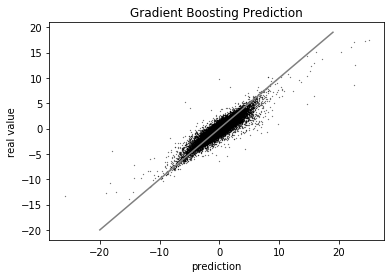

In [46]:
gb_train_pred = GBoost.predict(x_train)

x = np.arange(-20,20) 
y = x

plt.plot(x, y, color = 'gray')
plt.scatter(y_train, gb_train_pred, s=0.05, color='black')
plt.xlabel('prediction')
plt.ylabel('real value')
plt.title('Gradient Boosting Prediction')
plt.show()

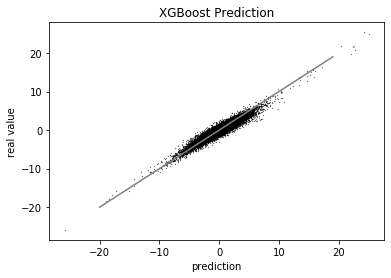

In [43]:
xgb_train_pred = model_xgb.predict(x_train)

x = np.arange(-20,20) 
y = x

plt.plot(x, y, color = 'gray')
plt.scatter(y_train, xgb_train_pred, s=0.05, color='black')
plt.xlabel('prediction')
plt.ylabel('real value')
plt.title('XGBoost Prediction')
plt.show()

In [36]:
print(model_xgb.feature_importances_)

[0.01592557 0.00542332 0.0245015  0.01204724 0.00953675 0.01149834
 0.01025908 0.00720061 0.01397272 0.00932954 0.00813512 0.01536532
 0.01282575 0.01252496 0.01462903 0.00945353 0.01178404 0.01731923
 0.01260626 0.02469305 0.09331828 0.01593248 0.01508731 0.00786704
 0.01253411 0.08668274 0.03547769 0.0259364  0.04012439 0.01558888
 0.25062817 0.01534428 0.01540071 0.00925925 0.00786577 0.0311471
 0.01895234 0.02258495 0.00637794 0.0076977  0.00716156 0.
 0.         0.         0.        ]


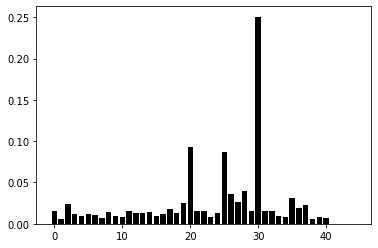

In [37]:
plt.bar(range(len(model_xgb.feature_importances_)), model_xgb.feature_importances_, color='black')
plt.savefig('feature_importance_graph.pdf', format='pdf')
plt.show()


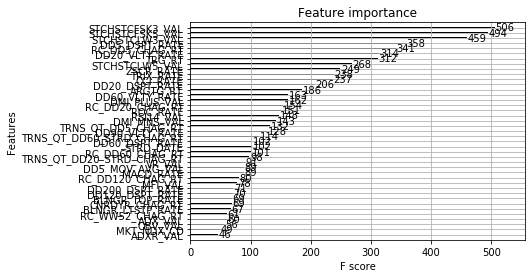

<Figure size 432x288 with 0 Axes>

In [38]:
from xgboost import plot_importance
plot_importance(model_xgb, color='black')
plt.show()
plt.savefig('feature_importance_all.pdf', format='pdf')

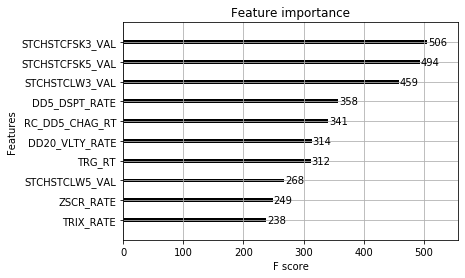

<Figure size 432x288 with 0 Axes>

In [39]:
plot_importance(model_xgb, max_num_features=10, color='black')
plt.show()
plt.savefig('feature_importance_top10.pdf', format='pdf')

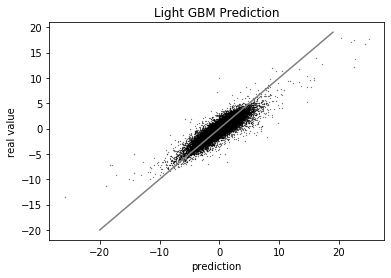

In [42]:
lgbm_train_pred = model_lgb.predict(x_train)

x = np.arange(-20,20) 
y = x

plt.plot(x, y, color = 'gray')
plt.scatter(y_train, lgbm_train_pred, s=0.05, color='black')
plt.xlabel('prediction')
plt.ylabel('real value')
plt.title('Light GBM Prediction')
plt.show()

In [ ]:
# --------------

In [ ]:
svr_train_pred = model_svr.predict(x_train)

x = np.arange(-20,20) 
y = x

plt.plot(x, y, color = 'gray')
plt.scatter(y_train, svr_train_pred, s=0.1, color='black')
plt.xlabel('prediction')
plt.ylabel('real value')
plt.title('Support Vector Regressor Prediction')
plt.show()

In [ ]:
regr_train_pred = regr.predict(x_train)

x = np.arange(-20,20) 
y = x

plt.plot(x, y, color = 'gray')
plt.scatter(y_train, regr_train_pred, s=0.1, color='black')
plt.xlabel('prediction')
plt.ylabel('real value')
plt.title('Random Forest Prediction')
plt.show()